# Point 1 - K-means (20%)

## 1.1 Use the database 'proves_saber_2023_scores.xlsx' to obtain the average by educational institution of the scores for each competence. That is, the following columns.


In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("data/point1/pruebas_saber_2023_scores.xlsx")
df

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_EXTERIOR,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_GLOBAL,PERCENTIL_NBC,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,0,TI,COLOMBIA,F,03/01/2001,NO,20231,EK202310108228,ESTUDIANTE,COLOMBIA,...,2.0,28,30,148,60.0,70.0,61.403944,4.0,3,PUBLICAR
1,1,CC,COLOMBIA,M,14/06/2002,NO,20231,EK202310146951,ESTUDIANTE,COLOMBIA,...,2.0,36,38,120,15.0,13.0,53.902622,2.0,3,PUBLICAR
2,2,CC,COLOMBIA,F,22/05/2002,NO,20231,EK202310146844,ESTUDIANTE,COLOMBIA,...,2.0,52,54,146,57.0,53.0,65.881886,4.0,3,PUBLICAR
3,3,CC,COLOMBIA,F,02/06/2001,NO,20231,EK202310165034,ESTUDIANTE,COLOMBIA,...,3.0,69,63,136,40.0,33.0,71.978823,4.0,3,PUBLICAR
4,4,CC,COLOMBIA,M,04/01/2002,NO,20231,EK202310155253,ESTUDIANTE,COLOMBIA,...,3.0,87,82,155,70.0,63.0,67.067764,4.0,3,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139283,139283,CC,COLOMBIA,F,19/10/2001,NO,20231,EK202310236326,ESTUDIANTE,COLOMBIA,...,2.0,16,17,133,35.0,41.0,59.912471,4.0,2,PUBLICAR
139284,139284,CC,COLOMBIA,M,25/01/1999,NO,20231,EK202310228645,ESTUDIANTE,COLOMBIA,...,3.0,86,88,134,36.0,45.0,56.499579,3.0,2,PUBLICAR
139285,139285,CC,COLOMBIA,M,24/01/1996,NO,20231,EK202310115566,ESTUDIANTE,COLOMBIA,...,1.0,9,10,106,4.0,4.0,58.080184,3.0,3,PUBLICAR
139286,139286,CC,COLOMBIA,M,30/03/2001,NO,20231,EK202310111780,ESTUDIANTE,COLOMBIA,...,2.0,31,33,119,14.0,17.0,60.075855,4.0,3,PUBLICAR


In [6]:
df = pd.read_excel("data/point1/ColumnsPoint1.xlsx")
df

,INST_NOMBRE_INSTITUCION,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL
0,FUNDACION UNIVERSITARIA-CEIPA-SABANETA,164,157,152.0,130,148
1,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,132,109,126.0,138,120
2,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,150,134,142.0,149,146
3,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,141,113,132.0,159,136
4,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,147,146,173.0,171,155
...,...,...,...,...,...,...
139283,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,131,151,142.0,120,133
139284,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,146,108,120.0,171,134
139285,UNIVERSIDAD ECCI-BOGOTÁ D.C.,93,91,136.0,114,106
139286,UNIVERSIDAD ECCI-BOGOTÁ D.C.,91,97,161.0,133,119


In [7]:
dfPromedio = df.groupby('INST_NOMBRE_INSTITUCION').agg({
    'MOD_LECTURA_CRITICA_PUNT': 'mean',
    'MOD_COMPETEN_CIUDADA_PUNT': 'mean',
    'MOD_INGLES_PUNT': 'mean',
    'MOD_COMUNI_ESCRITA_PUNT': 'mean',
    'PUNT_GLOBAL': 'mean'
}).reset_index()

dfPromedio.columns = ['INST_NOMBRE_INSTITUCION', 'PROMEDIO_LECTURA_CRITICA', 'PROMEDIO_COMPETEN_CIUDADANA',
                       'PROMEDIO_INGLES', 'PROMEDIO_COMUNICACION_ESCRITA', 'PROMEDIO_GLOBAL']

dfPromedio

,INST_NOMBRE_INSTITUCION,PROMEDIO_LECTURA_CRITICA,PROMEDIO_COMPETEN_CIUDADANA,PROMEDIO_INGLES,PROMEDIO_COMUNICACION_ESCRITA,PROMEDIO_GLOBAL
0,CENTRO DE EDUCACION MILITAR-BOGOTÁ D.C.,140.000000,89.000000,172.000000,158.000000,143.000000
1,COLEGIO DE ESTUDIOS SUPERIORES DE ADMINISTRACI...,187.285714,189.571429,213.285714,174.428571,188.142857
2,COLEGIO MAYOR DE ANTIOQUIA-MEDELLIN,142.661972,137.821596,145.258216,145.328638,142.394366
3,COLEGIO MAYOR DE NUESTRA SEÑORA DEL ROSARIO-BO...,181.581901,181.940435,199.011455,162.762887,178.395189
4,COLEGIO MAYOR DEL CAUCA-POPAYAN,137.677596,128.234973,142.546448,144.786885,137.644809
...,...,...,...,...,...,...
256,UNIVERSIDAD TECNOLOGICA DE PEREIRA - ITP-PEREIRA,156.645094,145.832985,162.719078,145.720251,153.371608
257,"UNIVERSIDAD TECNOLOGICA DEL CHOCO""DIEGO LUIS C...",120.780965,107.649283,118.887875,122.267275,116.397653
258,UNIVERSIDAD-COLEGIO MAYOR DE CUNDINAMARCA-BOGO...,154.793233,145.127820,153.867925,146.759398,150.387218
259,UNIVERSITARIA AGUSTINIANA- UNIAGUSTINIANA-BOGO...,144.581651,131.590826,154.227523,141.267890,142.963303


In [8]:
numInstituciones = df['INST_NOMBRE_INSTITUCION'].nunique()

print("Número de instituciones diferentes:", numInstituciones)

Número de instituciones diferentes: 261


## 1.2 implement k-means algorithm without libraries using absolute value distance (known as rule 1), create class with fit methods (learn from data) and predict (predict the cluster of a new data with the centroids).

In [10]:
df = pd.read_excel("data/point1/promedio_puntajes_por_institucion.xlsx")

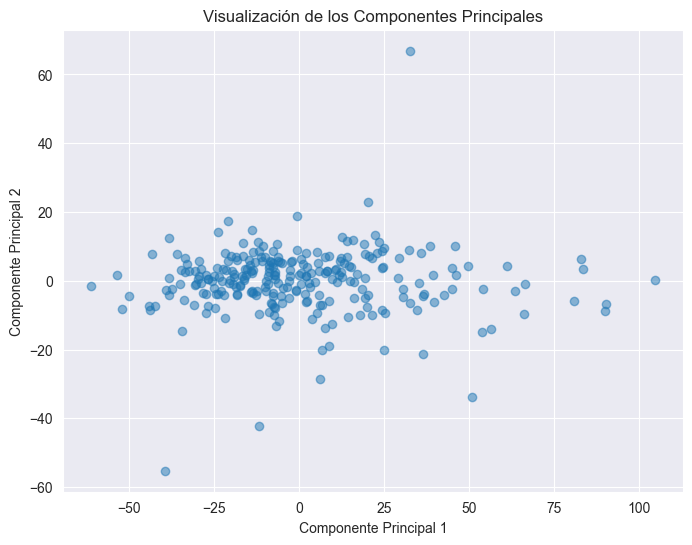

In [17]:
columnas_pca = ['PROMEDIO_LECTURA_CRITICA', 'PROMEDIO_COMPETEN_CIUDADANA', 'PROMEDIO_INGLES',
                'PROMEDIO_COMUNICACION_ESCRITA', 'PROMEDIO_GLOBAL']

X = df[columnas_pca]

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

df_pca['INST_NOMBRE_INSTITUCION'] = df['INST_NOMBRE_INSTITUCION']

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['Componente Principal 1'], df_pca['Componente Principal 2'], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de los Componentes Principales')
plt.grid(True)
plt.show()


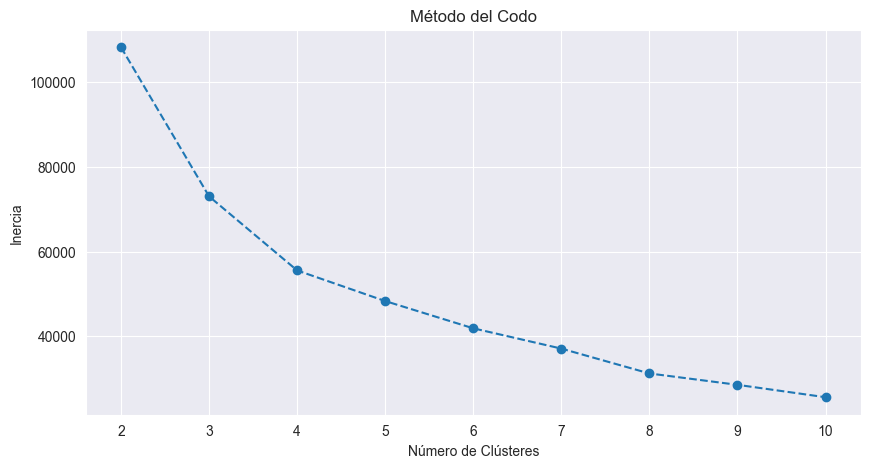

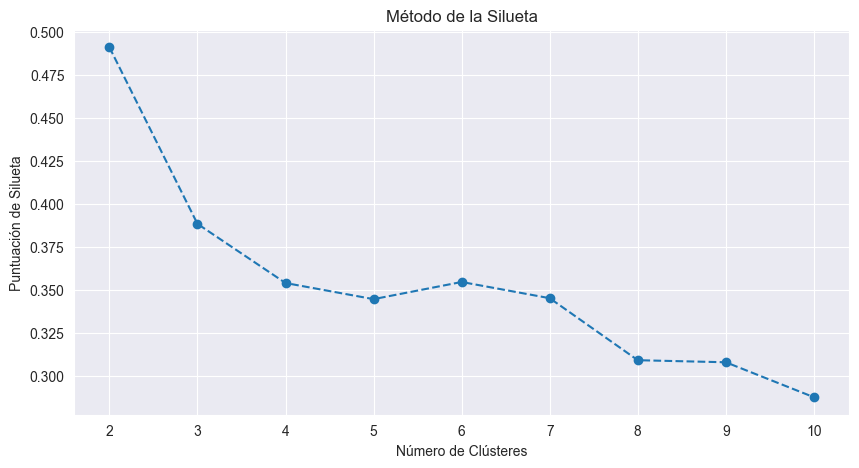

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

columnas_kmeans = ['PROMEDIO_LECTURA_CRITICA', 'PROMEDIO_COMPETEN_CIUDADANA', 'PROMEDIO_INGLES',
                   'PROMEDIO_COMUNICACION_ESCRITA', 'PROMEDIO_GLOBAL']

X = df[columnas_kmeans]

inercias = []

silhouette_scores = []

n_clusters_range = range(2, 11)

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    
    inercias.append(kmeans.inertia_)
    
    if n_clusters > 1:
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(n_clusters_range, inercias, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(n_clusters_range[:len(silhouette_scores)], silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

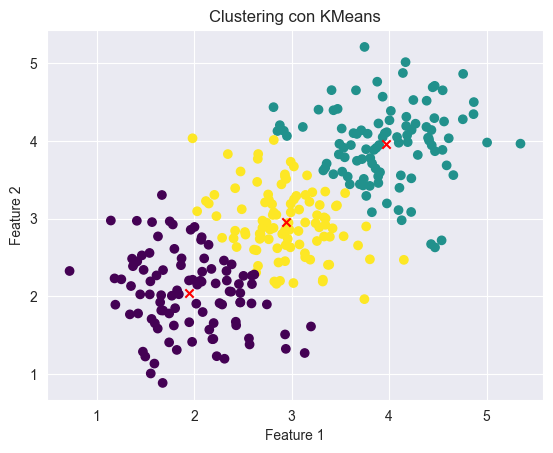

In [15]:
'''class Kmeans:
    
    def __init__(self, k):
        self.k = k
        self.mu = None
        self.his_mu = []
        
    def calculate_labels(self,X):
        dis = -2 * np.dot(X, self.mu.T) 
        dis = dis + np.power(X, 2).sum(axis=1).reshape((-1, 1))
        dis = dis + np.power(self.mu,2).sum(axis=1)
        n_l = dis.argsort(axis=1)[:,0].reshape((-1,1))
        return n_l
    
    def train(self, X, verbose=False):
        X = np.array(X)
        l = np.random.randint(0,high=self.k,size=(X.shape[0],1))
        n_l = None
        while n_l is None or not np.array_equal(l,n_l):
            cur_mu = []
            if n_l is not None:
                l = n_l
            X_l = np.hstack((X,l))
            for i in range(self.k):
                cur_mu.append( 
                    np.mean(
                        X_l[np.where(X_l[:,-1]==i),:-1],
                        axis=1
                    )
                )
            self.mu = np.vstack(cur_mu) 
            self.his_mu.append(self.mu)
            n_l = self.calculate_labels(X)
            if verbose: print(self.mu)
                
    def predict(self,X):
        n_l = self.calculate_labels(X)
        return n_l
    '''

import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, k, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
        
    def initialize_centroids(self, X):
        centroids_idx = np.random.choice(X.shape[0], size=self.k, replace=False)
        self.centroids = X[centroids_idx]
        
    def assign_clusters(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        self.labels = np.argmin(distances, axis=0)
        
    def update_centroids(self, X):
        new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])
        if np.allclose(new_centroids, self.centroids, atol=self.tol):
            return False
        self.centroids = new_centroids
        return True
        
    def fit(self, X):
        self.initialize_centroids(X)
        for _ in range(self.max_iters):
            self.assign_clusters(X)
            if not self.update_centroids(X):
                break
                
    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

# Generación de datos de ejemplo
np.random.seed(0)
s_row = 100
mu_data = [2, 3, 4]
X = np.vstack((np.random.normal(mu_data[0], 0.5, size=(s_row, 2)),
               np.random.normal(mu_data[1], 0.5, size=(s_row, 2)),
               np.random.normal(mu_data[2], 0.5, size=(s_row, 2))))

# Entrenamiento del modelo KMeans
kmeans = KMeans(k=3)
kmeans.fit(X)

# Predicción de los clústeres
labels = kmeans.predict(X)

# Visualización de los clústeres y los centroides
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x')
plt.title('Clustering con KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


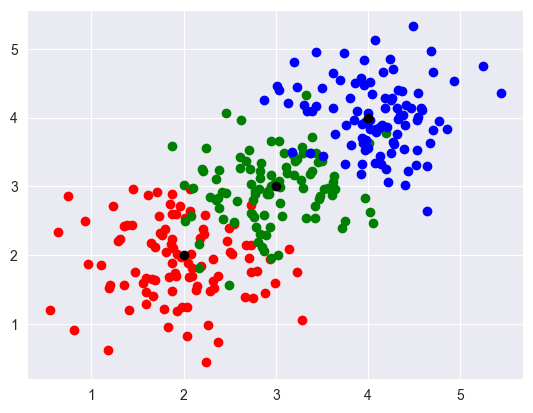

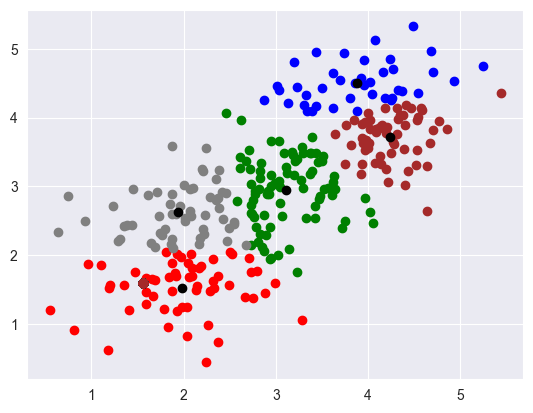

In [14]:
'''s_row = 100
mu_data = [2,3,4]
X = np.vstack( (np.random.normal(mu_data[0],0.5,size=(s_row,2)),
               np.random.normal(mu_data[1],0.5,size=(s_row,2)),
               np.random.normal(mu_data[2],0.5,size=(s_row,2)))
             )
fig, ax = plt.subplots(1,1)
ax.scatter(X[:s_row,0],X[:s_row,1],c='r')
ax.scatter(X[s_row:2*s_row,0],X[s_row:2*s_row,1],c='g')
ax.scatter(X[2*s_row:,0],X[2*s_row:,1],c='b')
ax.scatter(mu_data,
           mu_data, c='black')


fig, ax = plt.subplots(1,1)
kmeans = Kmeans(5)
kmeans.train(X)
label = kmeans.predict(X)
 
ax.scatter(X[np.where(label==0),0],X[np.where(label==0),1],c='r')
ax.scatter(X[np.where(label==1),0],X[np.where(label==1),1],c='b')
ax.scatter(X[np.where(label==2),0],X[np.where(label==2),1],c='g')
ax.scatter(X[np.where(label==3),0],X[np.where(label==3),1],c='gray')
ax.scatter(X[np.where(label==4),0],X[np.where(label==4),1],c='brown')
ax.scatter(kmeans.mu[:,0],kmeans.mu[:,1], c='black')'''